<a href="https://colab.research.google.com/github/hygoni/ToyTorch/blob/master/Tutorials/Pytorch%20Tutorial%20for%20Deep%20Learning%20Lovers/Logistic%20Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision.transforms import transforms
import torch.utils.data as datautils

import pandas as pd
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

cuda = torch.cuda.is_available()

## Preparing for data

In [2]:
from google.colab import files
print('Upload kaggle.json')
files.upload()

!cp kaggle.json /root/.kaggle/
!kaggle competitions download -c digit-recognizer
!ls

Upload kaggle.json


Saving kaggle.json to kaggle (1).json
train.csv: Skipping, found more recently modified local copy (use --force to force download)
test.csv: Skipping, found more recently modified local copy (use --force to force download)
sample_submission.csv: Skipping, found more recently modified local copy (use --force to force download)
'kaggle (1).json'   sample_data		    test.csv
 kaggle.json	    sample_submission.csv   train.csv


In [3]:
train = pd.read_csv('./train.csv')
train.head() 

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
image_numpy = train.loc[:, train.columns != 'label'].values / 255 # normalization
label_numpy = train.label.values

In [0]:
image_train, image_test, label_train, label_test = train_test_split(image_numpy, label_numpy, test_size = 0.2, random_state = 42)

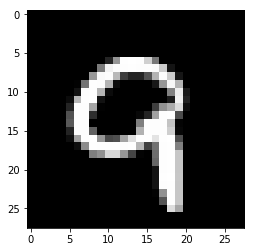

In [6]:
plt.imshow(image_train[10].reshape(28, 28), cmap='gray')

In [0]:
image_train = torch.from_numpy(image_train).float()
label_train = torch.from_numpy(label_train).type(torch.LongTensor)

image_test = torch.from_numpy(image_test).float()
label_test = torch.from_numpy(label_test).type(torch.LongTensor)

In [0]:
train_set = datautils.TensorDataset(image_train, label_train)
test_set = datautils.TensorDataset(image_test, label_test)

train_loader = datautils.DataLoader(train_set, batch_size = 100, shuffle = False)
test_loader = datautils.DataLoader(test_set, batch_size = 100, shuffle = False)                       

In [9]:
print(image_train.shape)

torch.Size([33600, 784])


## Building model

In [0]:
class LogisticRegression(nn.Module):
    def __init__(self, in_size, out_size):
        super(LogisticRegression, self).__init__()
        self.linear = nn.Linear(in_size, out_size)
        
        if cuda:
            self.linear = self.linear.cuda()
        
    def forward(self, x):
        out = self.linear(x)
        return out

## Training

In [0]:
in_size = 28 * 28
out_size = 10

net = LogisticRegression(in_size, out_size)
get_loss = nn.CrossEntropyLoss()
learning_rate = 0.001
optimizer = optim.Adam(net.parameters(), lr = learning_rate)

In [27]:
from torch.autograd import Variable

batch_size = 100
n_epoch = 100
loss_graph = []

for epoch in range(n_epoch):
    print('Epoch : {}'.format(epoch))
    for x, label in train_loader:
        x = Variable(x, requires_grad = True)
        
        if cuda:
            x = x.cuda()
            label = label.cuda()
        
        optimizer.zero_grad()
        out = net(x)
        loss = get_loss(out, label)
        loss.backward()
        optimizer.step()
        loss_graph.append(loss.data)
    if epoch % 10 == 9:
        print('[{}] Last Loss : {}'.format(epoch, loss_graph[-1]))

Epoch : 0
Last Loss : 0.34186768531799316
Epoch : 1
Last Loss : 0.2389807552099228
Epoch : 2
Last Loss : 0.20040221512317657
Epoch : 3
Last Loss : 0.18065208196640015
Epoch : 4
Last Loss : 0.16894084215164185
Epoch : 5
Last Loss : 0.1612941324710846
Epoch : 6
Last Loss : 0.15592315793037415
Epoch : 7
Last Loss : 0.15191802382469177
Epoch : 8
Last Loss : 0.14877361059188843
Epoch : 9
Last Loss : 0.1461915373802185
Epoch : 10
Last Loss : 0.14398695528507233
Epoch : 11
Last Loss : 0.1420423537492752
Epoch : 12
Last Loss : 0.1402808427810669
Epoch : 13
Last Loss : 0.138652041554451
Epoch : 14
Last Loss : 0.13712246716022491
Epoch : 15
Last Loss : 0.13567017018795013
Epoch : 16
Last Loss : 0.13428036868572235
Epoch : 17
Last Loss : 0.13294318318367004
Epoch : 18
Last Loss : 0.13165192306041718
Epoch : 19
Last Loss : 0.13040219247341156
Epoch : 20
Last Loss : 0.12919044494628906
Epoch : 21
Last Loss : 0.12801456451416016
Epoch : 22
Last Loss : 0.12687218189239502
Epoch : 23
Last Loss : 0.125

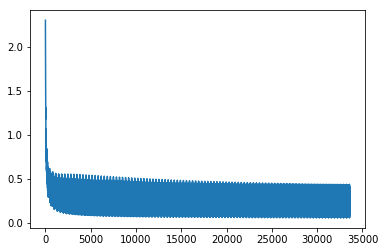

In [28]:
plt.plot(loss_graph)

## Accuracy estimation

In [0]:
total = 0
correct = 0

for x, label in test_loader:
    with torch.no_grad():
        x = Variable(x, requires_grad = True)
        
        if cuda:
            x = x.cuda()
            label = label.cuda()
        out = net(x)
        predicted = torch.max(out.data, 1)[1]
        total += x.shape[0]
        correct += (predicted == label).sum()

In [31]:
accuracy = 100 * int(correct) / total
print('Accuracy : {:.2f}%'.format(accuracy))

Accuracy : 92.11%


## Submission to Kaggle

In [88]:
pd.read_csv('sample_submission.csv').head(1)

,ImageId,Label
0,1,0


In [64]:
test = pd.read_csv('test.csv')
print(test.shape)
test.head(0) #no labels

(28000, 784)


,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783


In [0]:
test = torch.from_numpy(test.values).float()

In [0]:
test_set = datautils.TensorDataset(test)
test_loader = datautils.DataLoader(test_set, batch_size = 100, shuffle = False)

In [0]:
label_list = []

In [0]:
for x in test_loader:
    with torch.no_grad():
        x = x[0]
        if cuda:
            x = x.cuda()
            
        out = net(x)
        predicted = torch.max(out.data, 1)[1]

        label_list += [int(i) for i in predicted]

In [90]:
from collections import OrderedDict

id_list = [i for i in range(1, len(label_list) + 1)]
print(len(label_list), len(id_list))

submission = pd.DataFrame(OrderedDict(
    [('ImageId', id_list),
    ('Label', label_list)]
))

28000 28000


In [91]:
submission.head()

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,7
4,5,3


In [0]:
submission.to_csv('submission.csv', index = False)
files.download('submission.csv')

## Submission Result : Accuracy 0.8657